<img src="../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Quantum World*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

***
### Contributors
Jay Gambetta and Ismael Faro

In [1]:
import getpass, time
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import available_backends, execute, register, least_busy

# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

APItoken = getpass.getpass('Please input your token and hit enter: ')
qx_config = {
    "APItoken": APItoken,
    "url":"https://quantumexperience.ng.bluemix.net/api"}

try:
    register(qx_config['APItoken'], qx_config['url'])

    print('\nYou have access to great power!')
    print(available_backends({'local': False, 'simulator': False}))
except: 
    print('Something went wrong.\nDid you enter a correct token?')

Please input your token and hit enter: ········

You have access to great power!
['ibmq_16_rueschlikon', 'ibmq_5_tenerife', 'ibmq_5_yorktown']


In [2]:
backend = least_busy(available_backends({'simulator': False, 'local': False}))
print("The least busy backend is " + backend)

The least busy backend is ibmqx5


In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)
job_exp = execute(qc, backend=backend, shots=1024, max_credits=3)

lapse = 0
interval = 30
while not job_exp.done:
    print('Status @ {} seconds'.format(interval * lapse))
    print(job_exp.status)
    time.sleep(interval)
    lapse += 1
print(job_exp.status)

Status @ 0 seconds
{'job_id': None, 'status': <JobStatus.INITIALIZING: 'job is being initialized'>, 'status_msg': 'Job is initializing. Please, wait a moment.'}
Status @ 30 seconds
{'job_id': '5b4585135e0e98003a89c121', 'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': 'job has successfully run'}
{'job_id': '5b4585135e0e98003a89c121', 'status': <JobStatus.DONE: 'job has successfully run'>, 'status_msg': 'job has successfully run'}


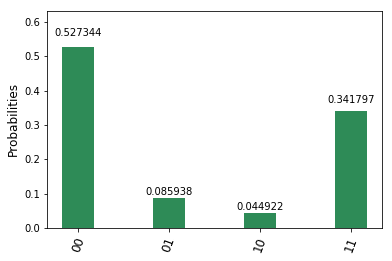

You have made entanglement!


In [4]:
plot_histogram(job_exp.result().get_counts(qc))

print('You have made entanglement!')

The circuit that was run on the machine is

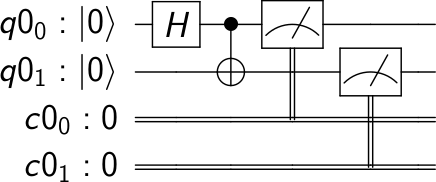

In [5]:
circuit_drawer(qc)